In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read csv file and tranformed into dataframe 

df=pd.read_csv('Copper_Set.csv',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
df.head()


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
# verify the unique items in every features

for i in list(df.columns):
    print(f"{i} : {df[i].nunique()}")

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [6]:
# Changing Column names containing spaces

df = df.rename(columns={'delivery date': 'delivery_date'})
df = df.rename(columns={'item type': 'item_type'})
df = df.rename(columns={'quantity tons': 'quantity_tons'})

In [7]:
#convert the data type from object to numeric

df['quantity_tons'] = pd.to_numeric(df['quantity_tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery_date'] = pd.to_datetime(df['delivery_date'], format='%Y%m%d', errors='coerce').dt.date

In [8]:
# make additional feature from date's columns 

df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
df['delivery_time_taken']=(df['item_date']-df['delivery_date']).abs().dt.days

In [9]:
# Checking data Types

df.dtypes

id                             object
item_date              datetime64[ns]
quantity_tons                 float64
customer                      float64
country                       float64
status                         object
item_type                      object
application                   float64
thickness                     float64
width                         float64
material_ref                   object
product_ref                     int64
delivery_date          datetime64[ns]
selling_price                 float64
delivery_time_taken           float64
dtype: object

In [10]:
#checking null values in each features

df.isnull().sum()

id                         2
item_date                  3
quantity_tons              1
customer                   1
country                   28
status                     2
item_type                  0
application               24
thickness                  1
width                      0
material_ref           77919
product_ref                0
delivery_date              3
selling_price              1
delivery_time_taken        6
dtype: int64

In [12]:
# droping the columns

df.drop(columns=['id','item_date','delivery_date','material_ref'], inplace=True)
df

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0
...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,1.0
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,1.0
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,1.0
181671,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,1.0


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity_tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08
delivery_time_taken,181667.0,6.413128e+01,4.095861e+01,0.00,2.900000e+01,6.100000e+01,9.700000e+01,6.890000e+02


In [18]:
# Checking for Null values

df.isnull().sum()

quantity_tons           5
customer                1
country                28
status                  2
item_type               0
application            24
thickness               1
width                   0
product_ref             0
selling_price           8
delivery_time_taken     6
dtype: int64

In [19]:
# Handling null values using median and mode

df['status'].fillna(df['status'].mode().iloc[0],inplace=True)
df['quantity_tons'].fillna(df['quantity_tons'].median(),inplace=True)
df['customer'].fillna(df['customer'].median(),inplace=True)
df['country'].fillna(df['country'].median(),inplace=True)
df['application'].fillna(df['application'].median(),inplace=True)
df['thickness'].fillna(df['thickness'].median(),inplace=True)
df['selling_price'].fillna(df['selling_price'].median(),inplace=True)
df['delivery_time_taken'].fillna(df['delivery_time_taken'].median(),inplace=True)

In [20]:
# Verifying Null values after handling

df.isnull().sum()


quantity_tons          0
customer               0
country                0
status                 0
item_type              0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
delivery_time_taken    0
dtype: int64

In [21]:
df

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0
...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,1.0
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,1.0
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,1.0
181671,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,1.0


# skewness and outliers


In [22]:
#copy the dataframe to another to check the skewness and outliers

cp_df=df.copy()
cp_df.head()


,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0


In [26]:
#checking the skew for each features

for col in ['quantity_tons', 'customer', 'country', 'application', 'thickness', 'width','product_ref', 'selling_price','delivery_time_taken']:
        print(f'Skewness of {col}: {skew(cp_df[col])}')


Skewness of quantity_tons: 424.68730994731504
Skewness of customer: 86.9845901502091
Skewness of country: 0.7538286488466676
Skewness of application: 0.7245583983073829
Skewness of thickness: 303.4450657126513
Skewness of width: 0.37459367901082125
Skewness of product_ref: 1.0152071910463223
Skewness of selling_price: 301.38559971625915
Skewness of delivery_time_taken: 0.46972996509615955


In [27]:
# Function to Visualize thru Box plot, hist plot, violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column, palette=["skyblue"])
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50, color="orange")
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column, palette=["lightgreen"])
    plt.title(f'Violin Plot for {column}')
    plt.show()

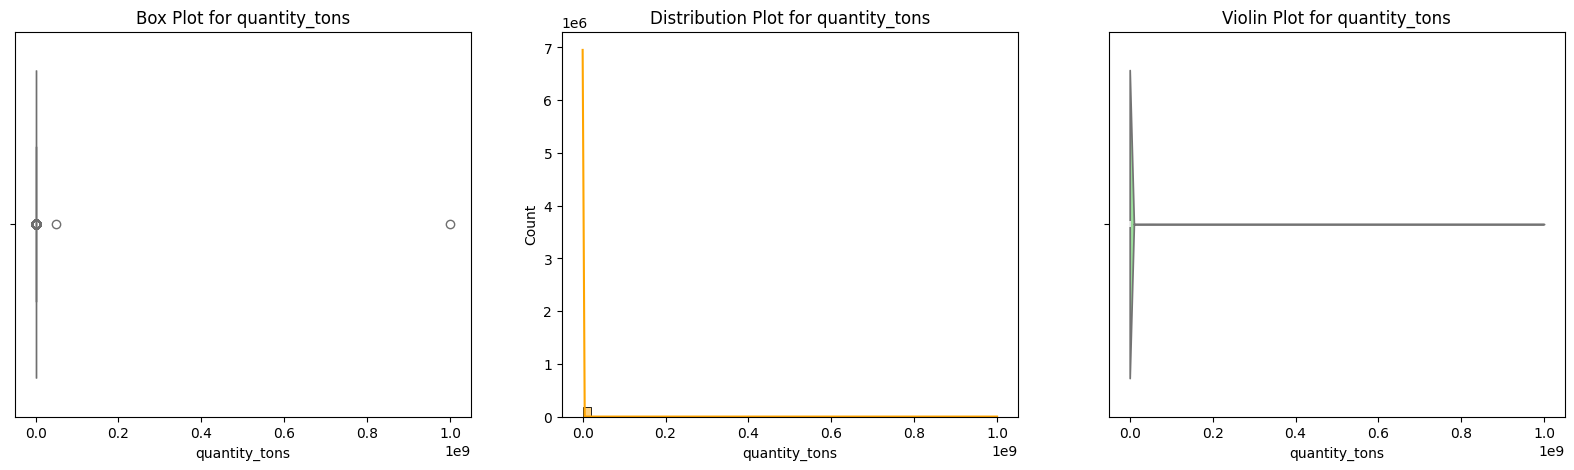

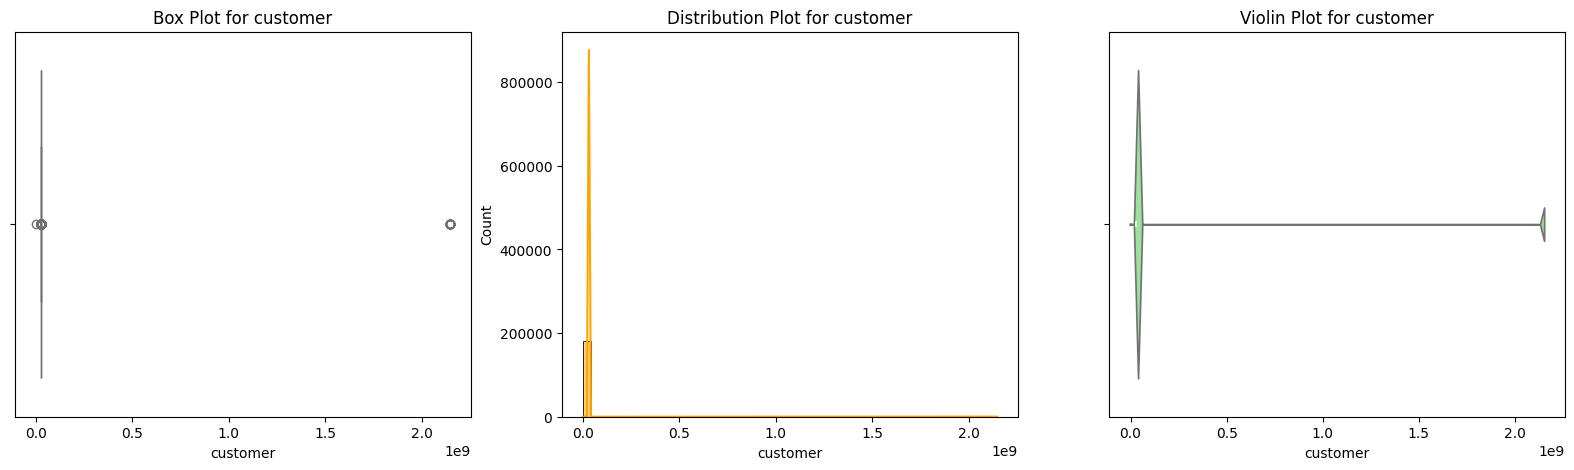

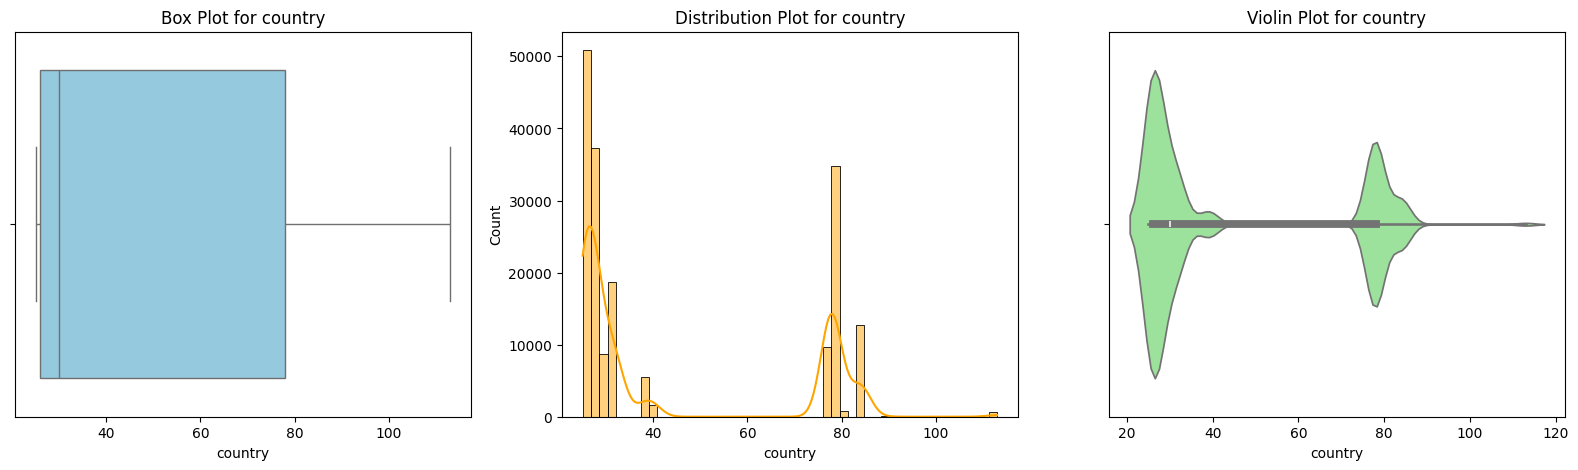

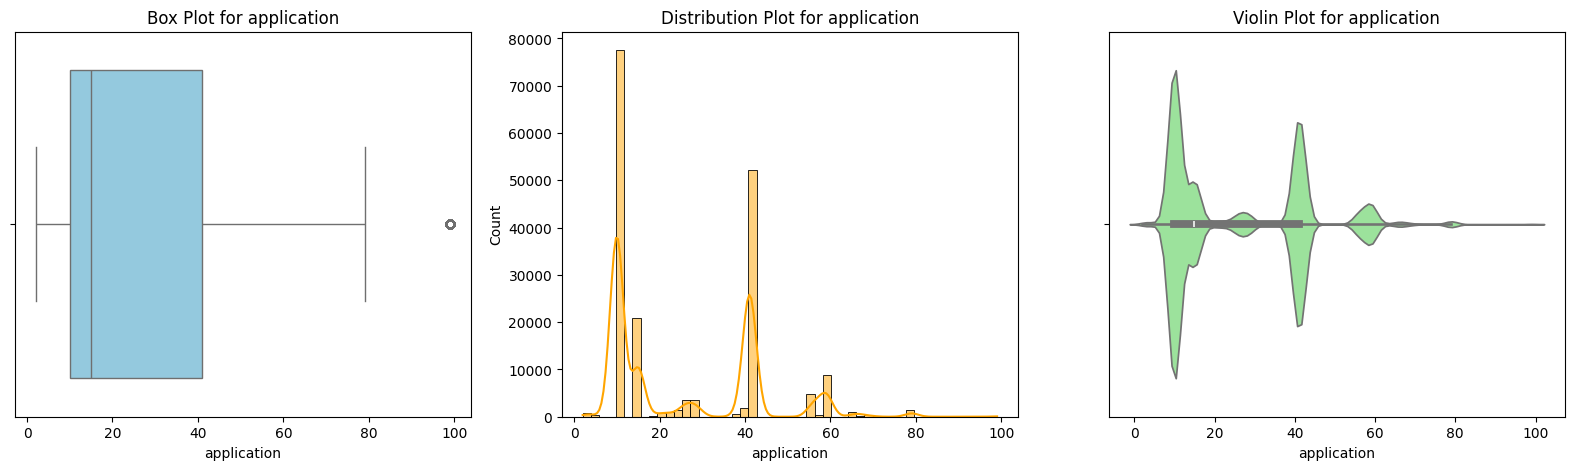

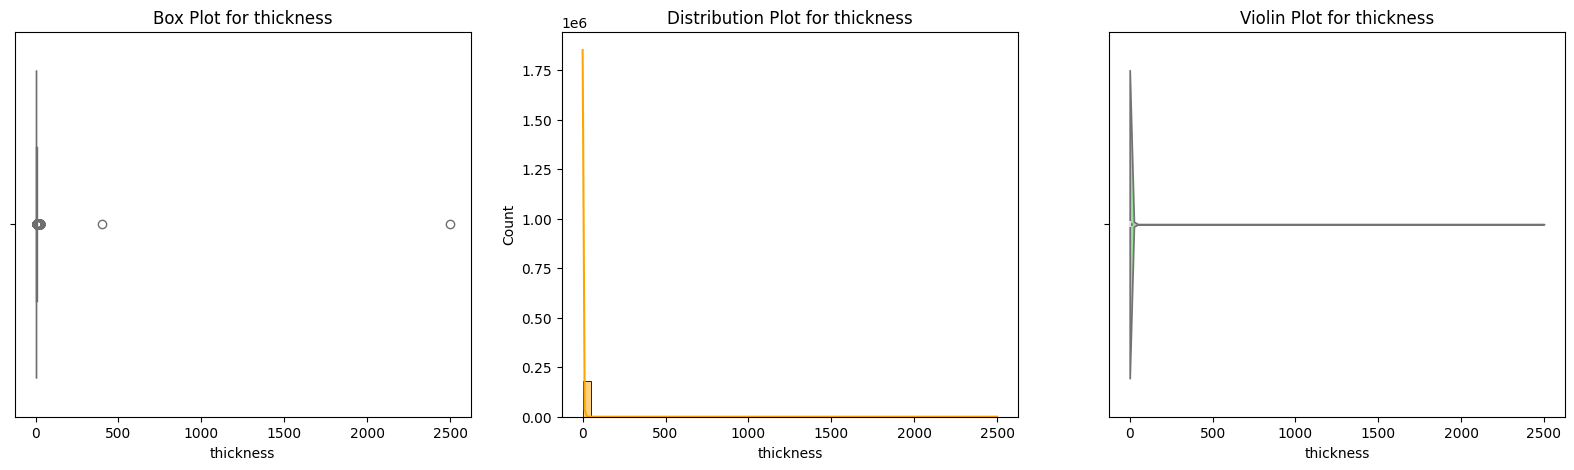

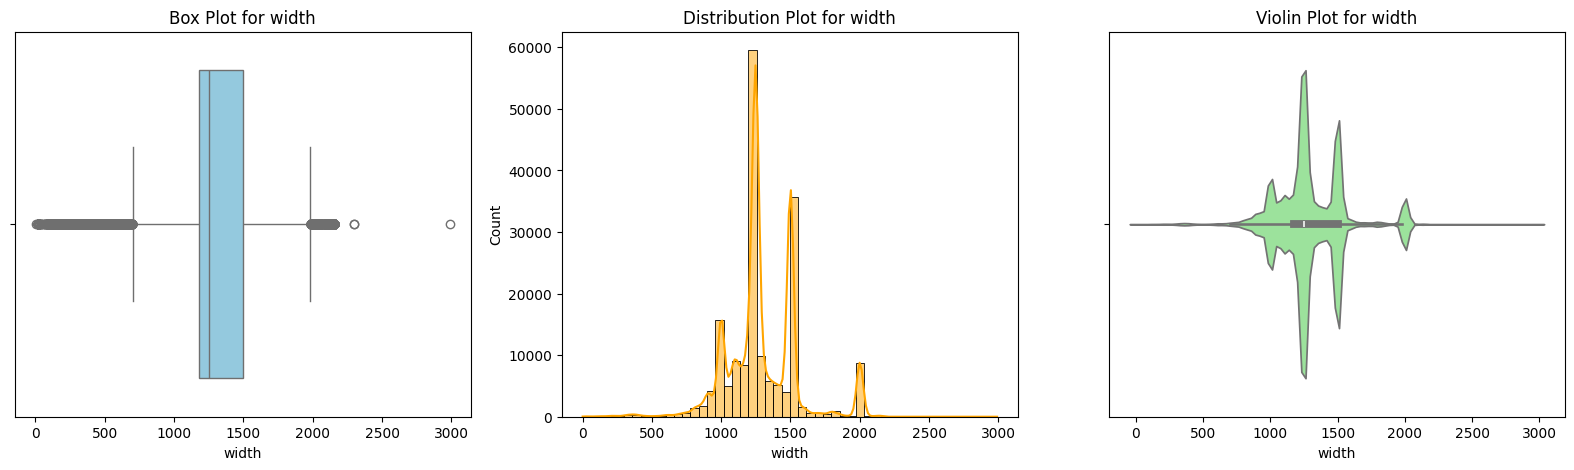

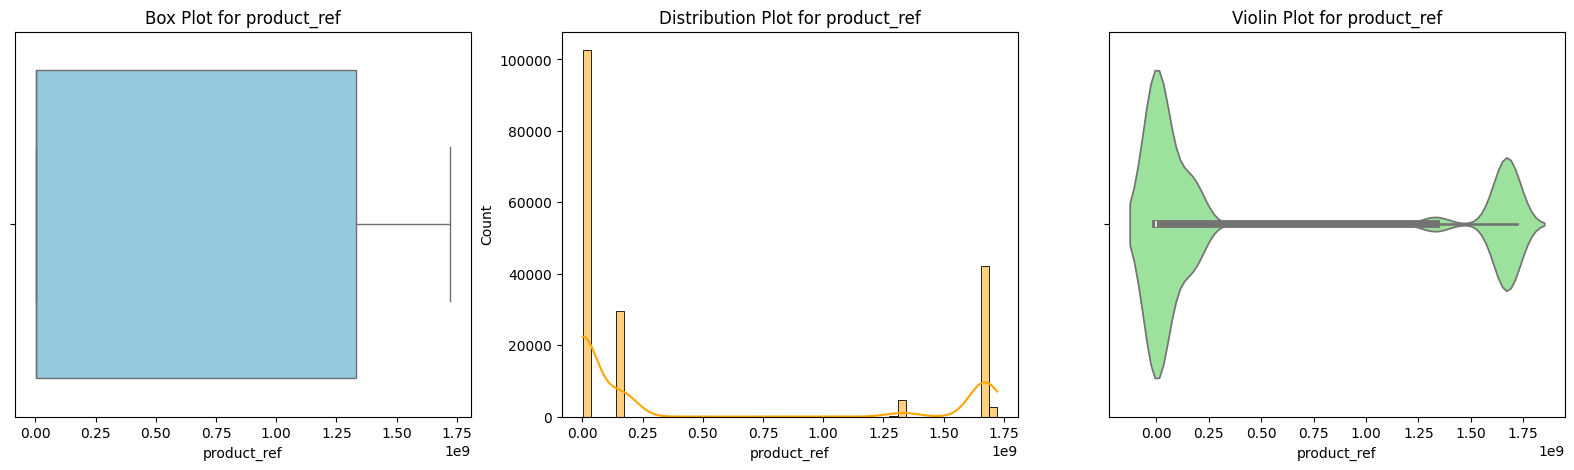

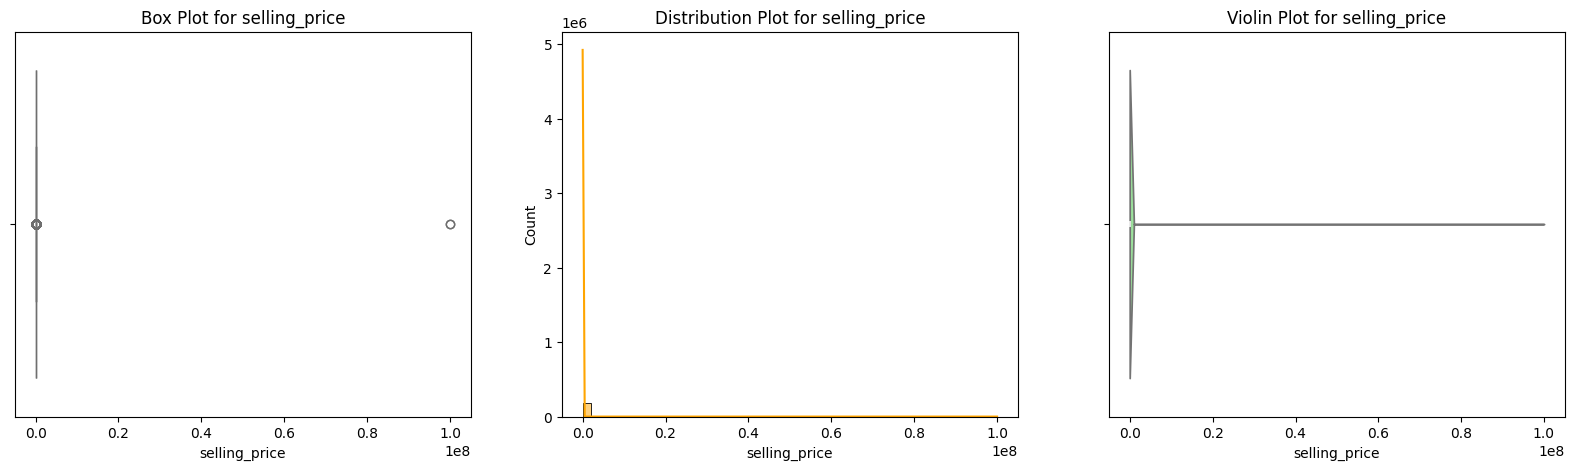

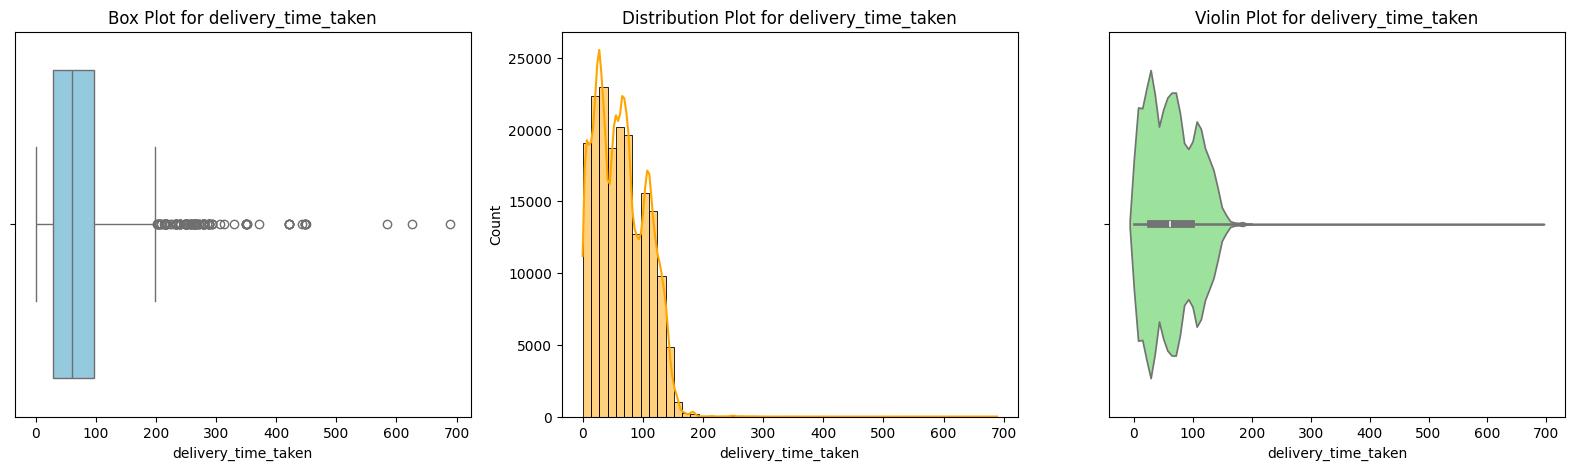

In [29]:
# plotting the features to check skew and outliers

for i in ['quantity_tons', 'customer', 'country', 'application', 'thickness', 'width','product_ref', 'selling_price','delivery_time_taken']:
    plot(cp_df, i)

In [31]:
# Handling skew with log transformation method

cp_df['quantity_tons_log']=np.log(cp_df['quantity_tons'])
cp_df['thickness_log']=np.log(cp_df['thickness'])
cp_df['selling_price_log']=np.log(cp_df['selling_price'])
cp_df.head()

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0,3.991779,0.693147,6.749931
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0,6.643822,-0.223144,6.953684
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0,5.956169,-0.967584,6.468211
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0,5.310301,0.832909,6.643790
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0,6.666354,1.386294,6.357842


In [33]:
cp_df.drop(columns=['quantity_tons','thickness','selling_price'], inplace=True)
cp_df.head()

,customer,country,status,item_type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,Won,W,10.0,2000.0,640665,31.0,6.666354,1.386294,6.357842


In [34]:
# outliers handle with IQR and cliping method 

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [35]:
# using outlier function handle the outliers for the below features

outlier(cp_df,'quantity_tons_log')
outlier(cp_df,'thickness_log')
outlier(cp_df,'selling_price_log')
outlier(cp_df,'width')
cp_df

,customer,country,status,item_type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,Won,W,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,Won,W,41.0,1220.0,164141591,1.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,Won,W,41.0,1500.0,164141591,1.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.0,3.413291,-0.162519,6.398595


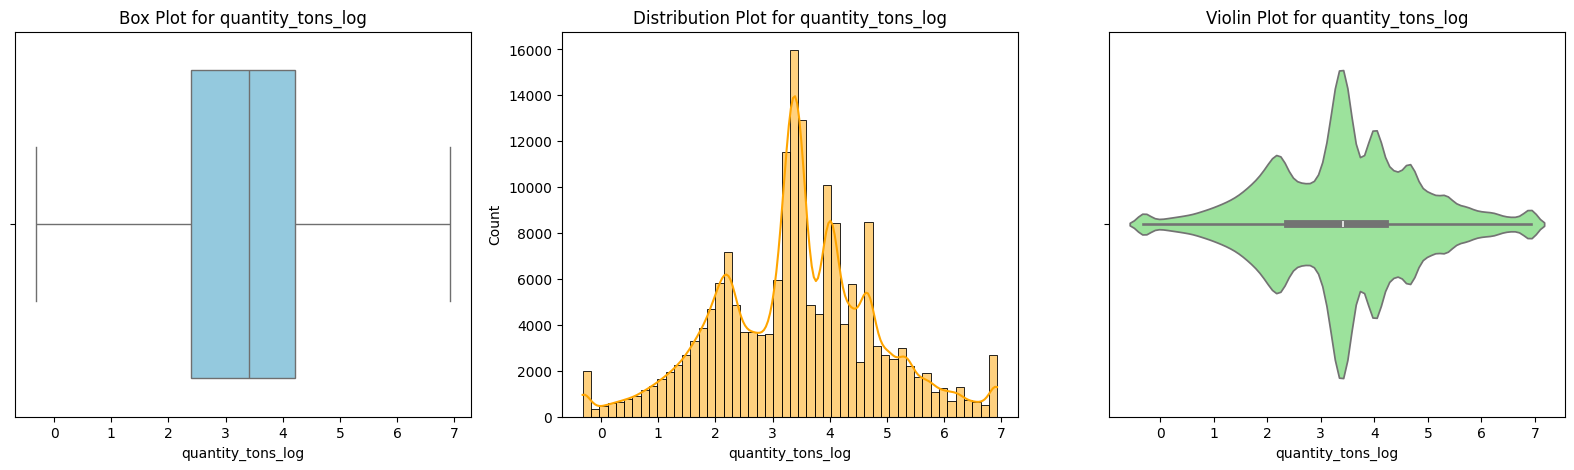

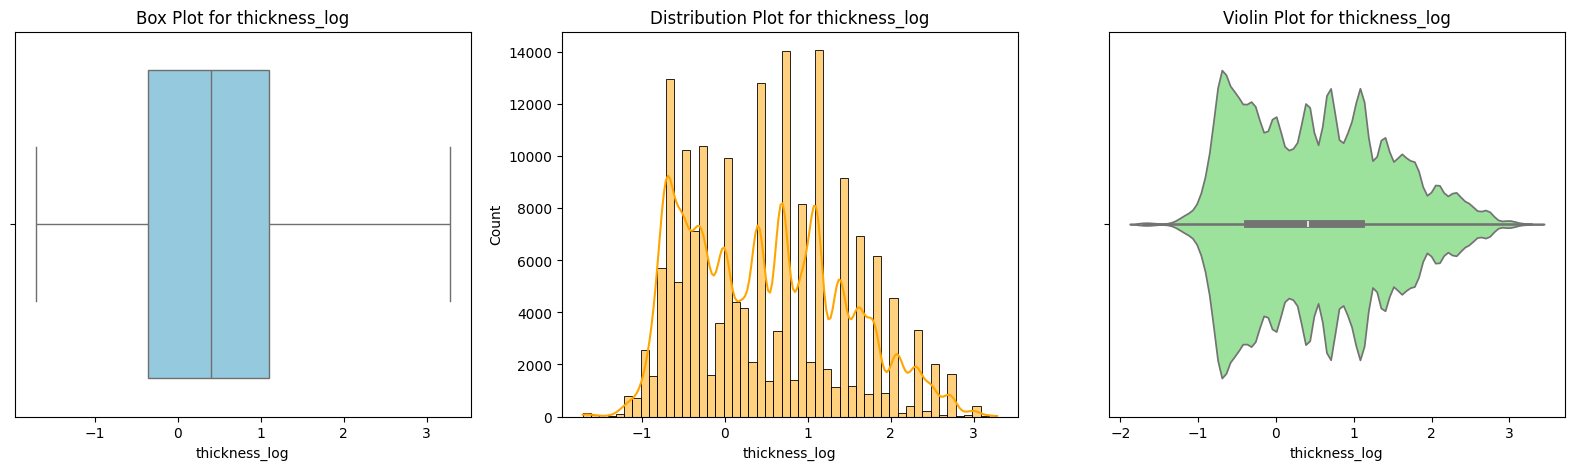

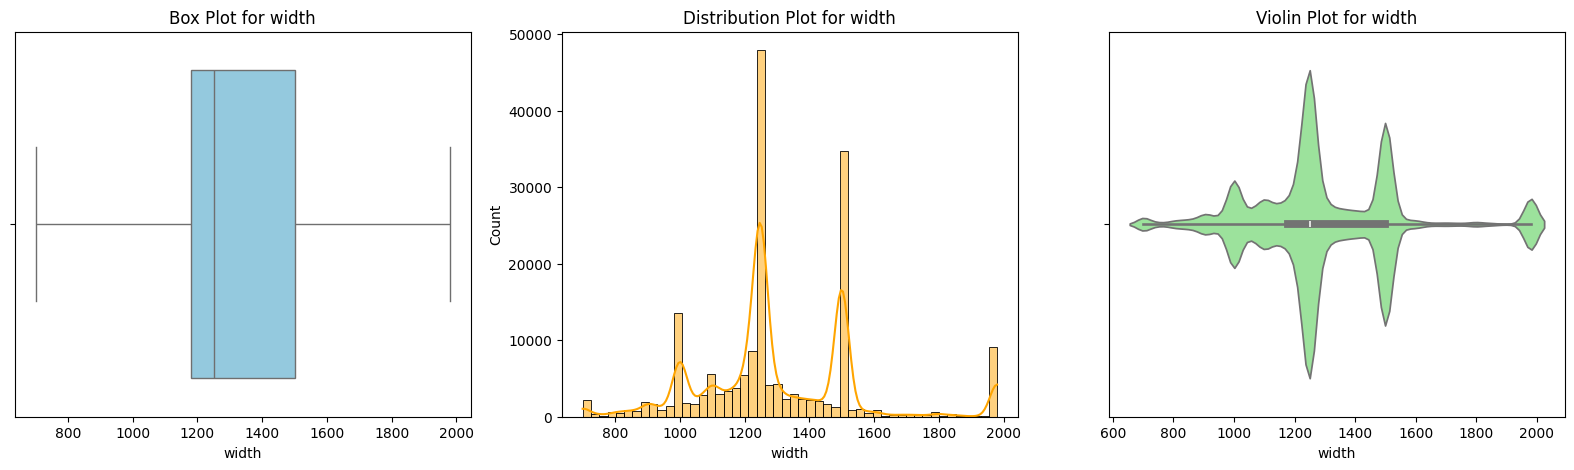

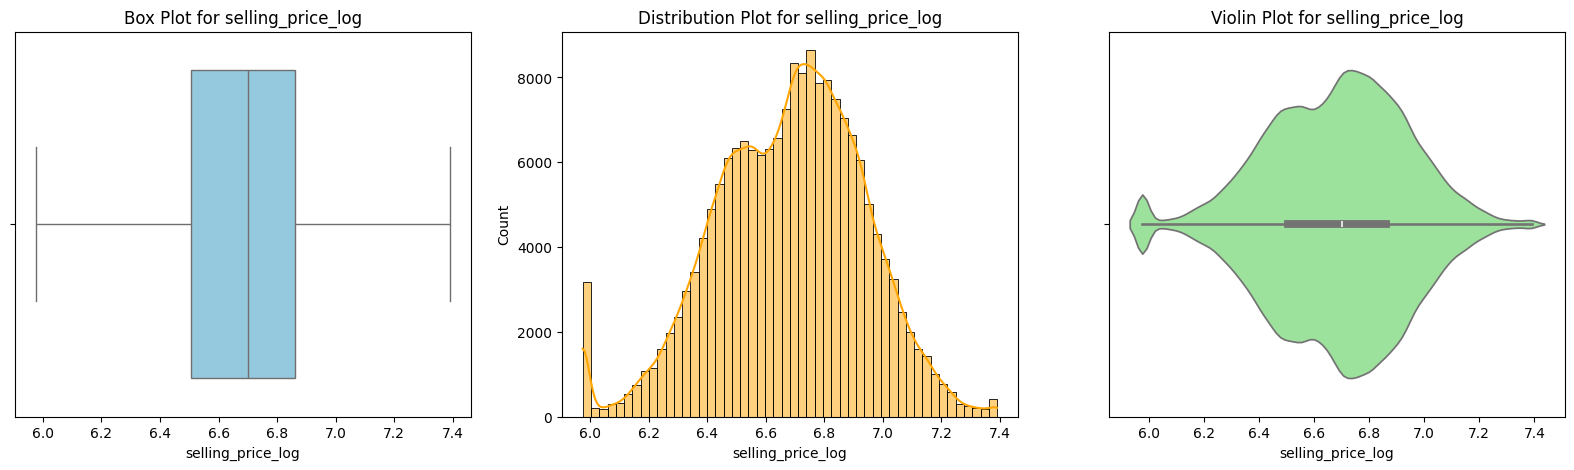

In [36]:
# plotting after skew and outliers 

for i in ['quantity_tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(cp_df, i)

<Axes: >

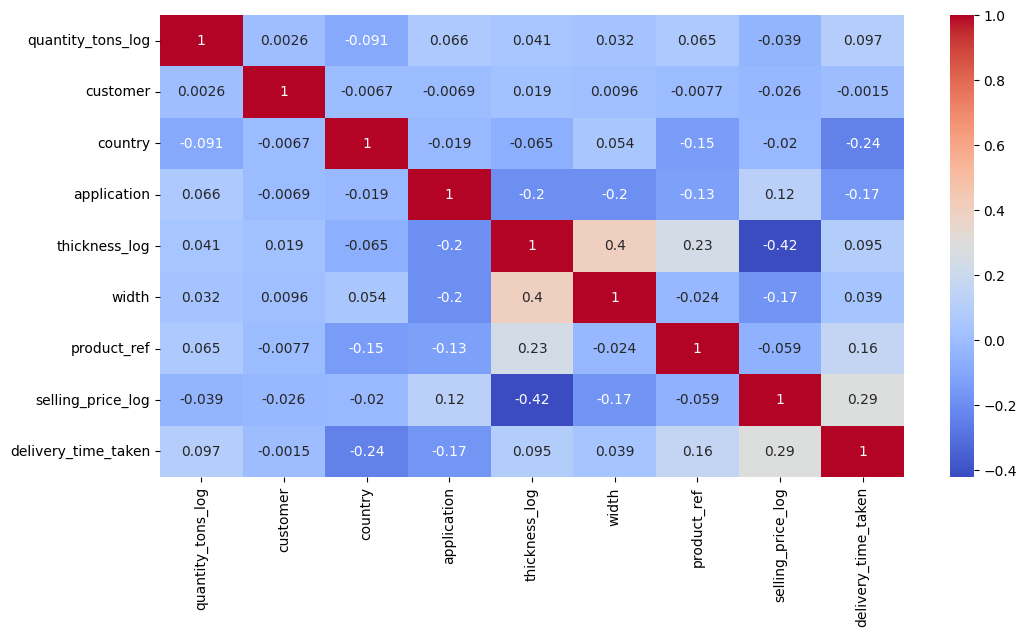

In [40]:
# verify any columns are highly correlated using Heatmap

cor=cp_df[['quantity_tons_log', 'customer', 'country', 'application', 'thickness_log', 'width','product_ref', 'selling_price_log','delivery_time_taken']].corr()

plt.figure(figsize=(12,6))
sns.heatmap(cor, annot=True, cmap="coolwarm")


# Regression model to predict selling price


In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


from sklearn import metrics
import numpy as np

import pickle

In [42]:
cpp_df=cp_df.copy()
cpp_df

,customer,country,status,item_type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,Won,W,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,Won,W,41.0,1220.0,164141591,1.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,Won,W,41.0,1500.0,164141591,1.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.0,3.413291,-0.162519,6.398595


In [44]:
# Checking values count to encoding the catogorical features

cpp_df["status"].value_counts()

status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [45]:
# using map function encoding the values in status column

cpp_df["status"]= cpp_df["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
cpp_df['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8])

In [47]:
# Checking values count to encoding the catogorical features

cpp_df['item_type'].value_counts()

item_type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

In [48]:
# using ordinalencoder to encode the values in item type column

cpp_df["item_type"]= OrdinalEncoder().fit_transform(cpp_df[["item_type"]])
cpp_df['item_type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [49]:
cpp_df.head()

,customer,country,status,item_type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842


In [50]:
# function to identify the best algorithm

def best_ML_algorithm(df,algorithms):
        x=df.drop(columns=['selling_price_log'],axis=1)
        y=df['selling_price_log']

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, results        

In [52]:
# using above function to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor,
            GradientBoostingRegressor, XGBRegressor]
best_algorithm, results = best_ML_algorithm(cpp_df, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                           Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                      0.162836            0.045489                 0.213281  0.302651
DecisionTreeRegressor                 0.054119            0.010187                 0.100932  0.843829
ExtraTreesRegressor                   0.046071            0.005682                 0.075378  0.912897
RandomForestRegressor                 0.045823            0.005510                 0.074232  0.915524
GradientBoostingRegressor             0.118057            0.021458                 0.146487  0.671040
XGBRegressor                          0.079373            0.011073                 0.105230  0.830243
**Best Algorithm:** RandomForestRegressor


In [53]:
# hyper parameter tuning to identify the best parameter using gridsearch cv

x=cpp_df.drop(columns=['selling_price_log'],axis=1)
y=cpp_df['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

param_grid = { 
    'n_estimators' :[100,150],
    'max_depth': [10,20],     
    'min_samples_split': [2,4], 
    'min_samples_leaf': [1,2],
    'max_features'    : ['sqrt', 'log2', None] }


grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                            param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)

grid_search.best_params_,grid_search.best_score_

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 np.float64(0.8953383329614532))

In [54]:
# with best algorithm matching the parameter from above result and train the model

x=cpp_df.drop(columns=['selling_price_log'],axis=1)
y=cpp_df['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = RandomForestRegressor(n_estimators=150,max_features=None,max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.04865670494149515
Mean Squared Error: 0.005851891925041096
Root Mean Squared Error: 0.07649765960499116
R-squared: 0.9102894678604176


In [55]:
# Checking the features scores and importants

feature_scores = pd.Series(model_regressor.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

product_ref            0.295662
delivery_time_taken    0.245779
status                 0.173063
country                0.072261
customer               0.067352
thickness_log          0.043541
quantity_tons_log      0.042084
application            0.023018
item_type              0.019436
width                  0.017804
dtype: float64

In [56]:
# Storing the model using pickle

with open('Regressor.pkl','wb') as files:
    pickle.dump(model_regressor,files)

In [57]:
# Loading the pickle and predict the selling price with regressor model

with open('Regressor.pkl','rb') as files:
    predict_model=pickle.load(files)

pre=predict_model.predict(np.array([[30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147]]))
np.exp(pre[0])

np.float64(779.8488645142141)

# Classifier Model to predict the Status


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

In [59]:
#filter out the values (won|lost) in status column

cpc_df=cpp_df[(cpp_df.status==1)|(cpp_df.status==0)]
cpc_df

,customer,country,status,item_type,application,width,product_ref,delivery_time_taken,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,0.0,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,90.0,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,90.0,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,31.0,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,1.0,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,1.0,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.0,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.0,3.413291,-0.162519,6.398595


In [60]:
#checking balance of the status values

cpc_df['status'].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

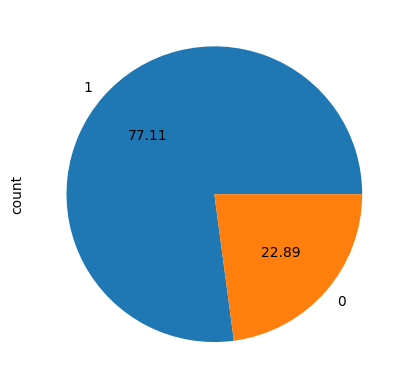

In [61]:
ax=cpc_df['status'].value_counts().plot.pie(autopct='%.2f')


Text(0.5, 1.0, 'over oversampling using smote')

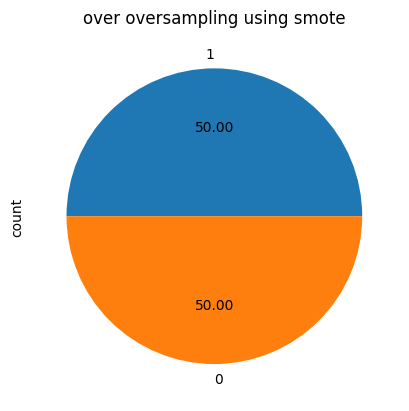

In [62]:
# oversampling the data using SMOTE 

x=cpc_df.drop('status',axis=1)
y=cpc_df['status']

smote= SMOTE()

x_smote, y_smote = smote.fit_resample(x,y) 

ax=y_smote.value_counts().plot.pie(autopct='%.2f')
ax.set_title('over oversampling using smote')

In [63]:
#  Function to identify the best classifier algorithm

def best_ML_class_algo(x_smote,y_smote,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)

                accuracy =metrics. accuracy_score(y_test, y_pred)
                precision =metrics. precision_score(y_test, y_pred)
                recall =metrics. recall_score(y_test, y_pred)
                f1 = metrics.f1_score(y_test, y_pred)

                results[algorithm.__name__] = {'Accuracy score': accuracy,'Precision': precision,'Recall': recall,'F1-score': f1}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['Accuracy score'])[0]  
        
        return best_algorithm, results  

In [64]:
# using above function try to identify the best algorithm

algorithms = [ DecisionTreeClassifier, ExtraTreesClassifier, RandomForestClassifier,
            GradientBoostingClassifier, XGBClassifier]
best_algorithm, results = best_ML_class_algo(x_smote,y_smote, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                            Accuracy score  Precision    Recall  F1-score
DecisionTreeClassifier            0.955565   0.956484  0.954024  0.955252
ExtraTreesClassifier              0.977603   0.987117  0.967577  0.977249
RandomForestClassifier            0.975491   0.985680  0.964716  0.975085
GradientBoostingClassifier        0.801215   0.817069  0.773270  0.794566
XGBClassifier                     0.933657   0.951870  0.912700  0.931874
**Best Algorithm:** ExtraTreesClassifier


In [65]:
# hyper parameter tuning to identify the best parameter using gridsearch cv

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators' :[50,100],
    'max_depth': [ 10,20,25],     
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 2]     }


model = ExtraTreesClassifier(random_state=42) 

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy",n_jobs=-1)

grid_search.fit(x_train, y_train)

grid_search.best_params_,grid_search.best_score_

({'max_depth': 25,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 np.float64(0.962866953569602))

In [66]:
# with best algorithm matching the parameter from bove result and train the model

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

model_classifier = ExtraTreesClassifier(n_estimators=100,max_depth=25,min_samples_leaf=1,min_samples_split=2)
model_classifier.fit(x_train, y_train)

y_pred = model_classifier.predict(x_test)

# evaluation metrics
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))


[[34657   346]
 [ 2005 32600]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     35003
           1       0.99      0.94      0.97     34605

    accuracy                           0.97     69608
   macro avg       0.97      0.97      0.97     69608
weighted avg       0.97      0.97      0.97     69608



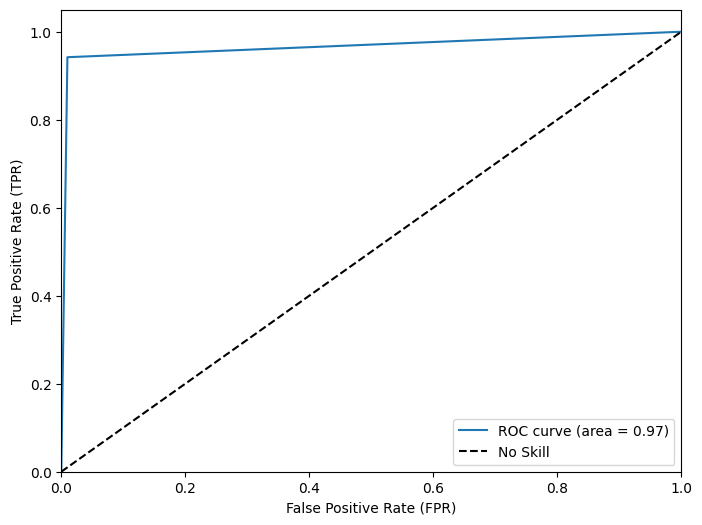

In [67]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
auc_curve=auc(x=fpr,y=tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_curve)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.show()

In [68]:
# checkig the features scores and importants

feature_scores = pd.Series(model_classifier.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

delivery_time_taken    0.179648
item_type              0.130736
customer               0.127443
country                0.114148
application            0.109394
quantity_tons_log      0.091116
selling_price_log      0.076374
thickness_log          0.064581
product_ref            0.063584
width                  0.042977
dtype: float64

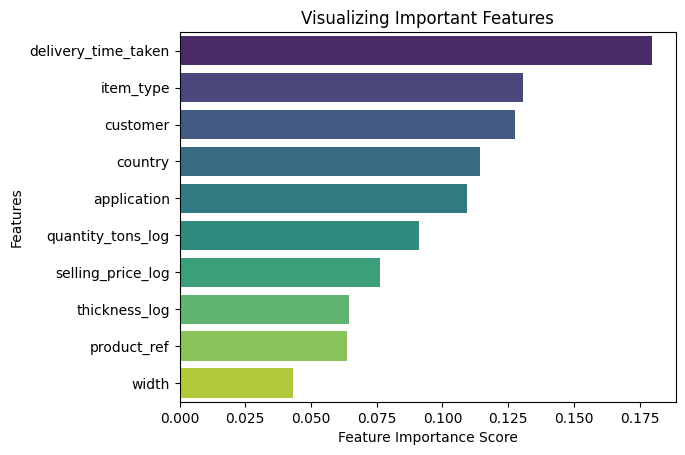

In [75]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index, palette="viridis")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [69]:
# storing the model using pickle

with open('Classifier.pkl','wb') as  files:
    pickle.dump(model_classifier,files)

In [70]:
# loading the pickle and predicting the status with classifier model

with open('Classifier.pkl','rb') as files:
    clas_model=pickle.load(files)

cla = clas_model.predict( np.array([[30156308.0,28.0,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931]]))
if cla[0] == 1:
    print('Won')
else:
    print('Lose')

Won
